#**Activity 6**


**Assessment Task:** Predicting Feedback on Online Food Orders Using Logistic Regression

**Objective:** Develop a logistic regression model to predict the customer feedback (positive/negative) on
online food orders. This task involves data loading, preprocessing, exploratory data analysis (EDA), model
building, evaluation, and visualization.

**Dataset:**
You will use a dataset that contains information on online food orders, including customer demographics,
order details, and feedback. The dataset includes features like Age, Gender, Marital Status, Occupation,
Monthly Income, and Feedback.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import numpy as np

#**Part 1: Data Loading and Preprocessing**

**1. Load the Dataset: Import the dataset using Pandas and display the first few rows to understand
its structure.**

In [ ]:
data = pd.read_csv('onlinefoods.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


**2. Handle Missing Values: Identify and handle any missing values in the dataset. Choose an
appropriate strategy (e.g., imputation or removal) based on the context.**

In [ ]:
data.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

**3. Encode Categorical Variables: Convert categorical variables into a numeric format suitable for
logistic regression. Consider techniques like one-hot encoding or label encoding**

In [ ]:
df_dummies = pd.get_dummies(data, drop_first=True)

In [ ]:
df_dummies.isna().sum()

Age                                         0
Family size                                 0
latitude                                    0
longitude                                   0
Pin code                                    0
Gender_Male                                 0
Marital Status_Prefer not to say            0
Marital Status_Single                       0
Occupation_House wife                       0
Occupation_Self Employeed                   0
Occupation_Student                          0
Monthly Income_25001 to 50000               0
Monthly Income_Below Rs.10000               0
Monthly Income_More than 50000              0
Monthly Income_No Income                    0
Educational Qualifications_Ph.D             0
Educational Qualifications_Post Graduate    0
Educational Qualifications_School           0
Educational Qualifications_Uneducated       0
Output_Yes                                  0
Feedback_Positive                           0
Unnamed: 12_Yes                   

**4. Feature Selection: Identify which features to include in the model. Justify your selections based
on the dataset's context and preliminary analysis.**

In [ ]:
X = df_dummies[['Pin code','Age', 'Family size', 'Gender_Male', 'Marital Status_Single', 'Occupation_House wife', 'Occupation_Self Employeed', 'Occupation_Student', 'Monthly Income_25001 to 50000', 'Monthly Income_Below Rs.10000', 'Monthly Income_More than 50000', 'Monthly Income_No Income', 'Educational Qualifications_Ph.D', 'Educational Qualifications_Post Graduate', 'Educational Qualifications_School', 'Educational Qualifications_Uneducated']]

Y = df_dummies['Feedback_Positive']

#**Part 2: Exploratory Data Analysis (EDA)**

**1. Descriptive Statistics: Use .describe() to summarize the numeric columns. Highlight any
interesting findings.**

In [ ]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


**2. Visualizations: Create visualizations to understand the relationships between features and thetarget variable. Suggestions include:**
* Distribution of Age and its impact on Feedback.
* Proportions of Feedback across different levels of Monthly Income.
* Correlation matrix heatmap to identify any interesting correlations between features.

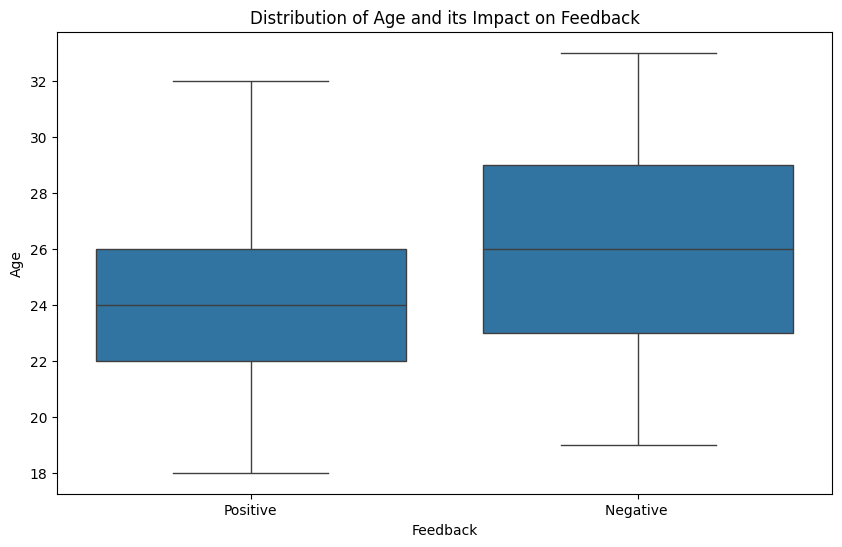

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feedback', y='Age', data=data)
plt.title('Distribution of Age and its Impact on Feedback')
plt.xlabel('Feedback')
plt.ylabel('Age')
plt.show()

<Figure size 1000x600 with 0 Axes>

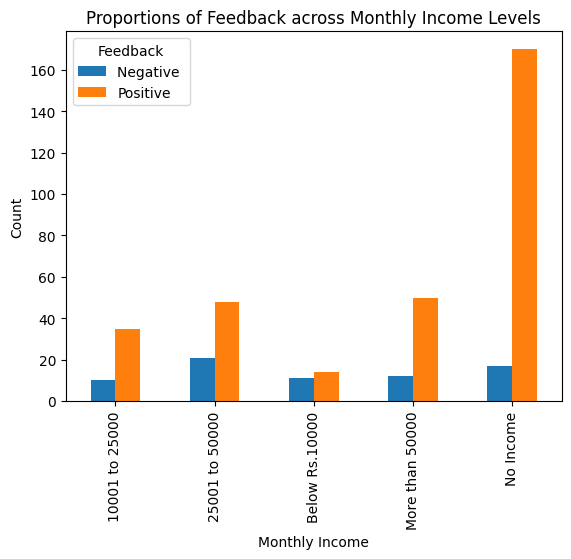

In [ ]:
income_feedback = data.groupby(['Monthly Income', 'Feedback']).size().unstack()

plt.figure(figsize=(10, 6))
income_feedback.plot(kind='bar', stacked=False)
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.legend(title='Feedback')
plt.show()

<ipython-input-149-355e3934240c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


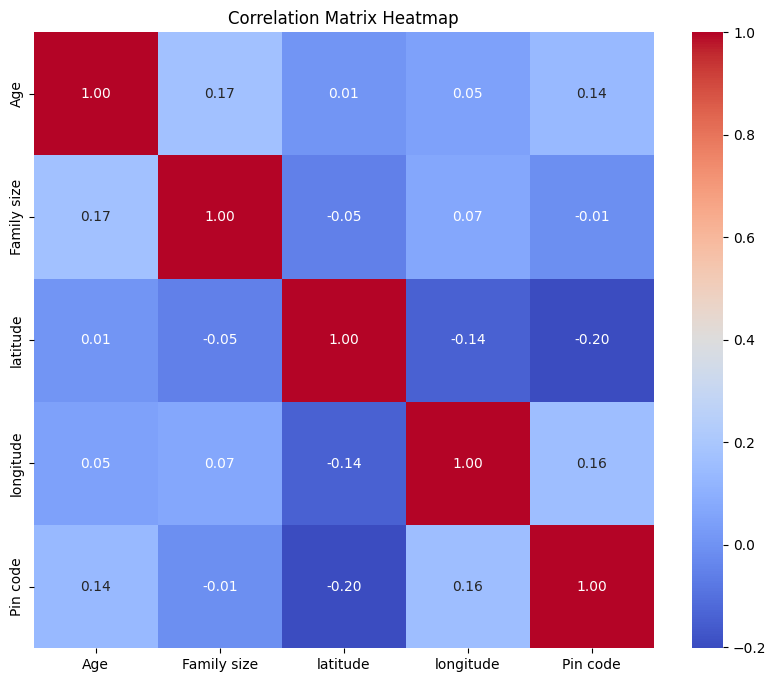

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

#**Part 3: Logistic Regression Model**

**1. Build the Model: Implement a logistic regression model using scikit-learn. Split your data into
training and test sets to evaluate the model's performance.**

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [ ]:
Y_pred = model.predict(X_test_scaled)

**2. Model Evaluation: Assess your model's performance using appropriate metrics, such as accuracy,
precision, recall, and the confusion matrix. Discuss the results.**

In [ ]:
accuracy = accuracy_score(Y_test,Y_pred)
conf_matrix = confusion_matrix(Y_test,Y_pred)
class_report = classification_report(Y_test,Y_pred)

In [ ]:
print(f'Accuracy          :   {accuracy}')
print(f'Confusion Matrix  :   {conf_matrix}')
print(f'Class Report      :\n   {class_report}')

Accuracy          :   0.8461538461538461
Confusion Matrix  :   [[ 1 10]
 [ 2 65]]
Class Report      :
                 precision    recall  f1-score   support

           0       0.33      0.09      0.14        11
           1       0.87      0.97      0.92        67

    accuracy                           0.85        78
   macro avg       0.60      0.53      0.53        78
weighted avg       0.79      0.85      0.81        78



#**Part 4: Data Analysis and Visualization**

**1. Feature Importance: Analyze and visualize the importance of different features in your logistic
regression model. Discuss how each feature influences the prediction of Feedback.**

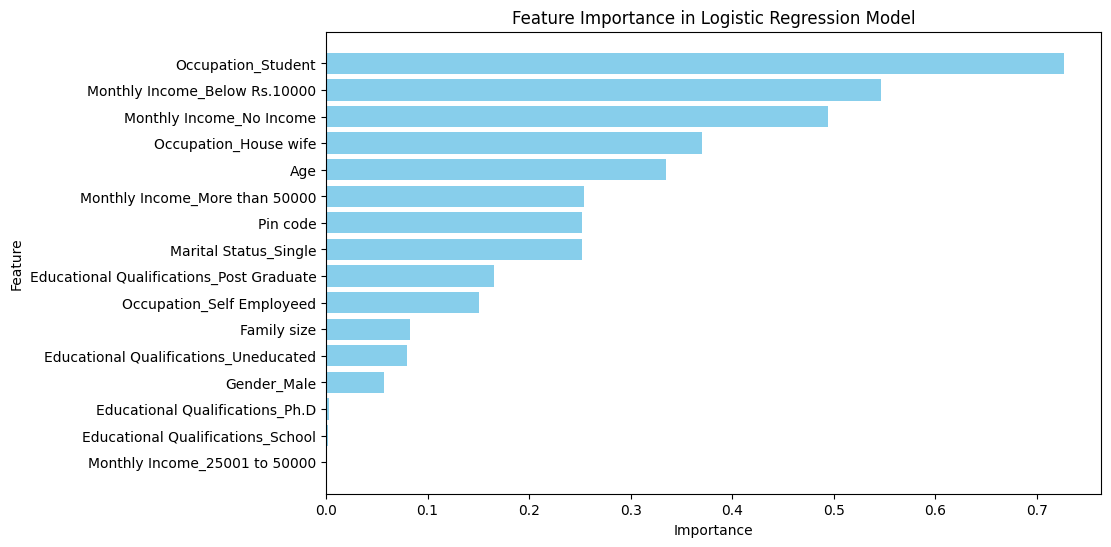

                                     Feature  Importance
7                         Occupation_Student    0.727016
9              Monthly Income_Below Rs.10000    0.546415
11                  Monthly Income_No Income    0.494649
5                      Occupation_House wife    0.369906
1                                        Age    0.334914
10            Monthly Income_More than 50000    0.254326
0                                   Pin code    0.252606
4                      Marital Status_Single    0.251742
13  Educational Qualifications_Post Graduate    0.165472
6                  Occupation_Self Employeed    0.150347
2                                Family size    0.082490
15     Educational Qualifications_Uneducated    0.080132
3                                Gender_Male    0.057542
12           Educational Qualifications_Ph.D    0.003259
14         Educational Qualifications_School    0.001609
8              Monthly Income_25001 to 50000    0.001391


In [ ]:

feature_importance = np.abs(model.coef_[0])
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.gca().invert_yaxis()
plt.show()

print(feature_importance_df)


**2. Prediction Insights: Visualize the distribution of predicted probabilities. Discuss any patterns or
insights you can derive from how the model makes predictions.**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


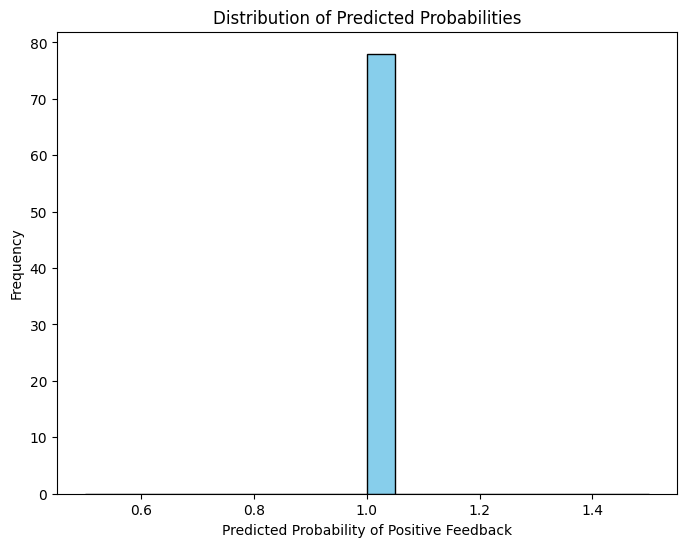

In [ ]:
predicted_probabilities = model.predict_proba(X_test)[:, 1]
plt.figure(figsize=(8, 6))
plt.hist(predicted_probabilities, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Probability of Positive Feedback')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()